Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [9]:
!pip install icecream

In [10]:
from random import random, seed
from itertools import product
import numpy as np

from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [17]:
UNIVERSE_SIZE = 10000
NUM_SETS = 1000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [18]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [21]:
MAX_STEPS = 10000 #50000 for universe_size=100000

In [14]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

In [15]:
def tweak(solution,tabu):
    new_solution = solution.copy()
    index = None
    #print("in")
    while index is None or np.random.random() < 0.5:
        #print("hey")
        index = np.random.randint(0, NUM_SETS)
        new_solution[index] = not new_solution[index]
        if not any(np.array_equal(new_solution, arr) for arr in tabu):
            #print("out")
            tabu.append(new_solution)
            return new_solution

ic| cost(solution): 127397.53101004352
ic| history.index(cost(solution)): 9477


[4278806.296816373, 4274461.092005154, 4270132.374280963, 4266015.1186300535, 4261792.25228355, 4257435.267497505, 4253151.271620147, 4248902.552529998, 4244500.777481265, 4240077.771496207, 4235876.046701519, 4231697.801181309, 4227175.595523283, 4222818.610737239, 4218591.044959405, 4214459.72196744, 4210043.793992812, 4205729.2035161, 4201548.610607012, 4197499.28530541, 4197499.28530541, 4193128.160727255, 4188921.738643893, 4184696.5226411205, 4180381.9321644083, 4176093.230714747, 4171797.4700266244, 4167464.042287682, 4163212.9722375087, 4158898.3817607965, 4154691.9596774345, 4150438.538549037, 4150438.538549037, 4146069.7708920436, 4141701.0032350505, 4137454.6349866698, 4133170.639109312, 4128799.5145311574, 4124506.107039786, 4120398.2271902957, 4116175.360843792, 4111975.9845144646, 4111975.9845144646, 4107630.7797032446, 4103311.480610586, 4099126.1925643138, 4094903.32621781, 4090664.0097846724, 4086316.4492104854, 4082105.329361543, 4077729.490594501, 4077729.490594501, 

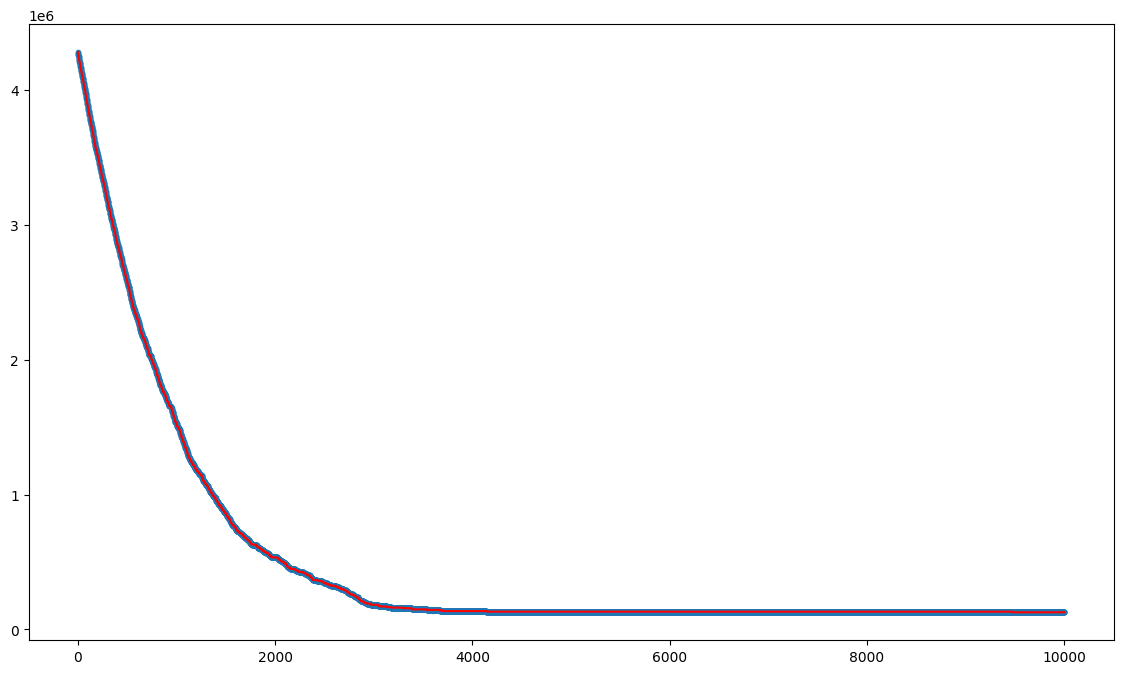

In [22]:
from itertools import accumulate
from matplotlib import pyplot as plt
solution = np.full(NUM_SETS, True)
history = [cost(solution)]
tabu = []
for n in range(MAX_STEPS):
  new_solution = tweak(solution,tabu)
  if cost(new_solution) < cost(solution) and valid(new_solution):
    solution = new_solution
  history.append(cost(solution))

ic(cost(solution))
ic(history.index(cost(solution)))
print(history)

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)),history, marker=".")

## Have Fun!

In [ ]:
UNIVERSE_SIZE = 1000
NUM_SETS = 100
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [ ]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = pow(SETS.sum(axis=1), 1.1)

In [ ]:
MAX_STEPS = 10000 #50000 for universe_size=100000

ic| cost(solution): 127397.53101004352
ic| history.index(cost(solution)): 9477


[4278806.296816373, 4274461.092005154, 4270132.374280963, 4266015.1186300535, 4261792.25228355, 4257435.267497505, 4253151.271620147, 4248902.552529998, 4244500.777481265, 4240077.771496207, 4235876.046701519, 4231697.801181309, 4227175.595523283, 4222818.610737239, 4218591.044959405, 4214459.72196744, 4210043.793992812, 4205729.2035161, 4201548.610607012, 4197499.28530541, 4197499.28530541, 4193128.160727255, 4188921.738643893, 4184696.5226411205, 4180381.9321644083, 4176093.230714747, 4171797.4700266244, 4167464.042287682, 4163212.9722375087, 4158898.3817607965, 4154691.9596774345, 4150438.538549037, 4150438.538549037, 4146069.7708920436, 4141701.0032350505, 4137454.6349866698, 4133170.639109312, 4128799.5145311574, 4124506.107039786, 4120398.2271902957, 4116175.360843792, 4111975.9845144646, 4111975.9845144646, 4107630.7797032446, 4103311.480610586, 4099126.1925643138, 4094903.32621781, 4090664.0097846724, 4086316.4492104854, 4082105.329361543, 4077729.490594501, 4077729.490594501, 

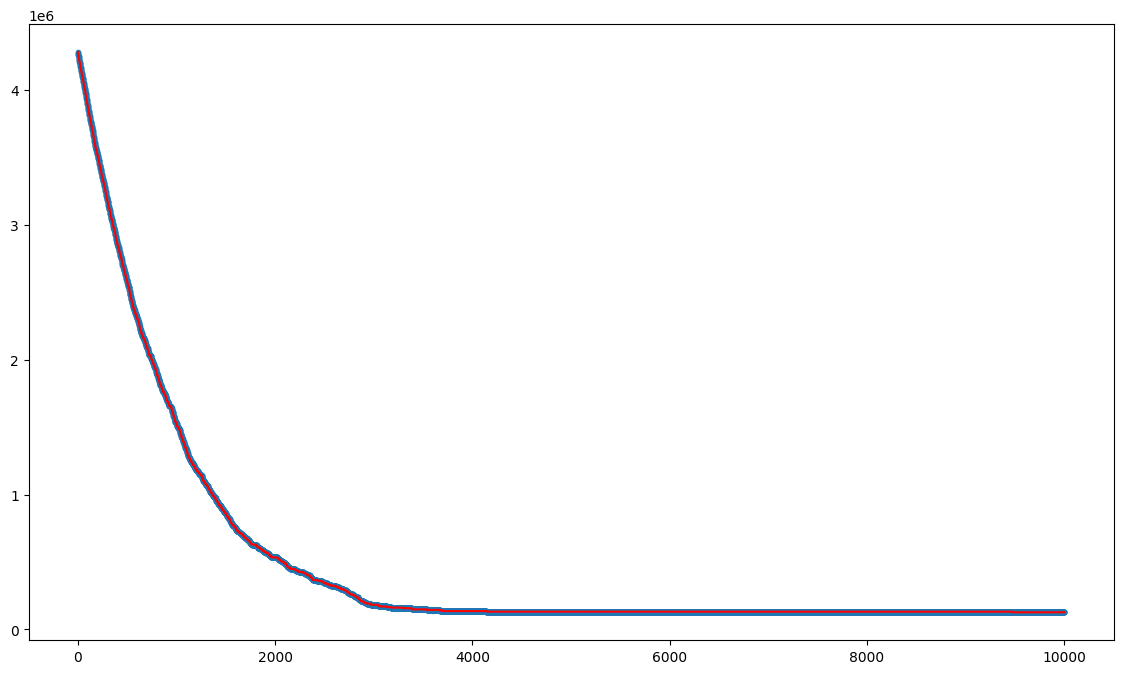

In [ ]:
from itertools import accumulate
from matplotlib import pyplot as plt
solution = np.full(NUM_SETS, True)
history = [cost(solution)]
tabu = []
for n in range(MAX_STEPS):
  new_solution = tweak(solution,tabu)
  if cost(new_solution) < cost(solution) and valid(new_solution):
    solution = new_solution
  history.append(cost(solution))

ic(cost(solution))
ic(history.index(cost(solution)))
print(history)

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)),history, marker=".")

In [35]:
UNIVERSE_SIZE = 100
NUM_SETS = 10
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [36]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = pow(SETS.sum(axis=1), 1.1)

In [37]:
MAX_STEPS = 10000 #50000 for universe_size=100000

In [38]:
from itertools import accumulate
from matplotlib import pyplot as plt
solution = np.full(NUM_SETS, True)
history = [cost(solution)]
tabu = []
for n in range(MAX_STEPS):
  new_solution = tweak(solution,tabu)
  if cost(new_solution) < cost(solution) and valid(new_solution):
    solution = new_solution
  history.append(cost(solution))

ic(cost(solution))
ic(history.index(cost(solution)))
print(history)

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)),history, marker=".")


ic| cost(solution): 294.30966503946087
ic| history.index(cost(solution)): 0


[294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087, 294.30966503946087,

'\nplt.figure(figsize=(14, 8))\nplt.plot(\n    range(len(history)),\n    list(accumulate(history, min)),\n    color="red",\n)\n_ = plt.scatter(range(len(history)),history, marker=".")\n'

In [39]:
UNIVERSE_SIZE = 1000
NUM_SETS = 100
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [40]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = pow(SETS.sum(axis=1), 1.1)

In [41]:
MAX_STEPS = 10000 #50000 for universe_size=100000

ic| cost(solution): 6038.515910079228
ic| history.index(cost(solution)): 6446


[33707.0279593964, 33391.50877749902, 33053.647527853114, 32693.308999249457, 32374.075848292116, 32051.124795998905, 31720.726291791223, 31394.05344296509, 31100.73332326403, 30727.22340129331, 30331.036037672464, 29976.329111771, 29640.33496692292, 29326.67128315961, 29001.859817210938, 28671.461313003252, 28318.629789458548, 28318.629789458548, 28318.629789458548, 27982.635644610466, 27982.635644610466, 27629.80412106577, 27299.405616858083, 27299.405616858083, 26985.74193309477, 26640.402921469675, 26640.402921469675, 26640.402921469675, 26283.81969135562, 25904.651845663622, 25587.27617311732, 25217.53388348482, 25217.53388348482, 25217.53388348482, 24898.300732527474, 24558.57143960063, 24241.195767054327, 23897.727588973237, 23556.129318506544, 23214.53104803985, 22865.447607924278, 22865.447607924278, 22865.447607924278, 22493.821936183147, 22493.821936183147, 22189.420685582132, 21838.463658618177, 21526.65447567285, 21199.981626846733, 21199.981626846733, 21199.981626846733, 

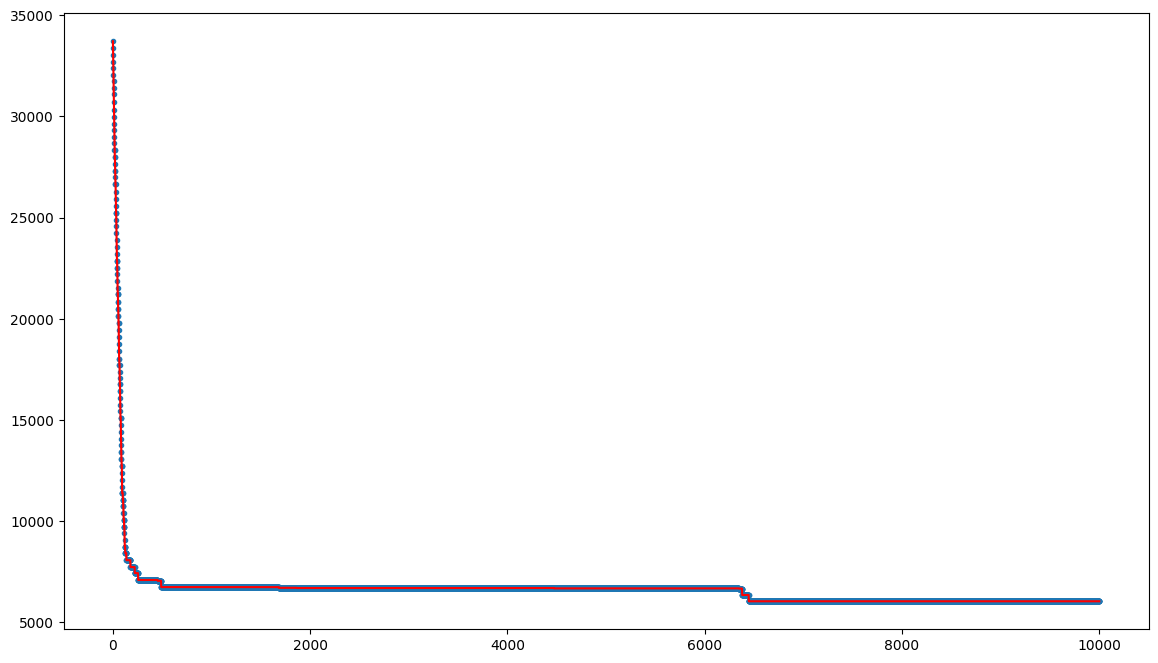

In [42]:
from itertools import accumulate
from matplotlib import pyplot as plt
solution = np.full(NUM_SETS, True)
history = [cost(solution)]
tabu = []
for n in range(MAX_STEPS):
  new_solution = tweak(solution,tabu)
  if cost(new_solution) < cost(solution) and valid(new_solution):
    solution = new_solution
  history.append(cost(solution))

ic(cost(solution))
ic(history.index(cost(solution)))
print(history)

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)),history, marker=".")


In [27]:
UNIVERSE_SIZE = 100000
NUM_SETS = 10000
DENSITY = 0.1

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [28]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = pow(SETS.sum(axis=1), 1.1)

In [29]:
MAX_STEPS = 50000 #50000 for universe_size=100000

ic| cost(solution): 127397.53101004352
ic| history.index(cost(solution)): 9477


[4278806.296816373, 4274461.092005154, 4270132.374280963, 4266015.1186300535, 4261792.25228355, 4257435.267497505, 4253151.271620147, 4248902.552529998, 4244500.777481265, 4240077.771496207, 4235876.046701519, 4231697.801181309, 4227175.595523283, 4222818.610737239, 4218591.044959405, 4214459.72196744, 4210043.793992812, 4205729.2035161, 4201548.610607012, 4197499.28530541, 4197499.28530541, 4193128.160727255, 4188921.738643893, 4184696.5226411205, 4180381.9321644083, 4176093.230714747, 4171797.4700266244, 4167464.042287682, 4163212.9722375087, 4158898.3817607965, 4154691.9596774345, 4150438.538549037, 4150438.538549037, 4146069.7708920436, 4141701.0032350505, 4137454.6349866698, 4133170.639109312, 4128799.5145311574, 4124506.107039786, 4120398.2271902957, 4116175.360843792, 4111975.9845144646, 4111975.9845144646, 4107630.7797032446, 4103311.480610586, 4099126.1925643138, 4094903.32621781, 4090664.0097846724, 4086316.4492104854, 4082105.329361543, 4077729.490594501, 4077729.490594501, 

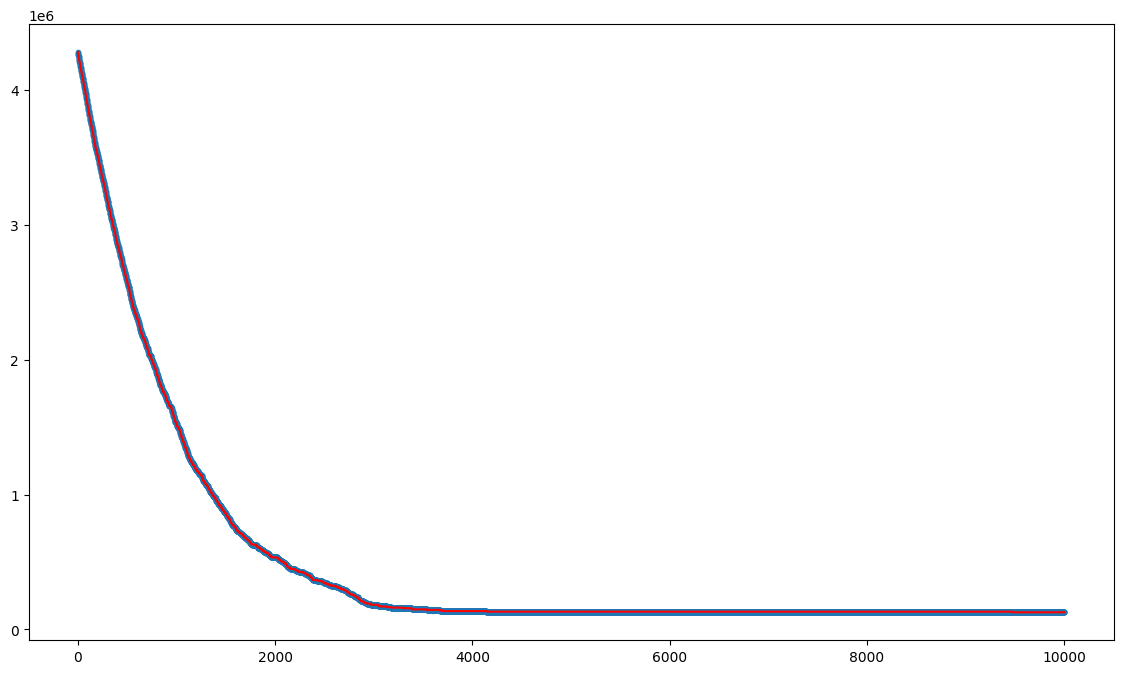

In [ ]:
from itertools import accumulate
from matplotlib import pyplot as plt
solution = np.full(NUM_SETS, True)
history = [cost(solution)]
tabu = []
for n in range(MAX_STEPS):
  new_solution = tweak(solution,tabu)
  if cost(new_solution) < cost(solution) and valid(new_solution):
    solution = new_solution
  history.append(cost(solution))

ic(cost(solution))
ic(history.index(cost(solution)))
print(history)

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)),history, marker=".")

In [ ]:
UNIVERSE_SIZE = 100000
NUM_SETS = 10000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [ ]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = pow(SETS.sum(axis=1), 1.1)

In [ ]:
MAX_STEPS = 50000 #50000 for universe_size=100000

ic| cost(solution): 127397.53101004352
ic| history.index(cost(solution)): 9477


[4278806.296816373, 4274461.092005154, 4270132.374280963, 4266015.1186300535, 4261792.25228355, 4257435.267497505, 4253151.271620147, 4248902.552529998, 4244500.777481265, 4240077.771496207, 4235876.046701519, 4231697.801181309, 4227175.595523283, 4222818.610737239, 4218591.044959405, 4214459.72196744, 4210043.793992812, 4205729.2035161, 4201548.610607012, 4197499.28530541, 4197499.28530541, 4193128.160727255, 4188921.738643893, 4184696.5226411205, 4180381.9321644083, 4176093.230714747, 4171797.4700266244, 4167464.042287682, 4163212.9722375087, 4158898.3817607965, 4154691.9596774345, 4150438.538549037, 4150438.538549037, 4146069.7708920436, 4141701.0032350505, 4137454.6349866698, 4133170.639109312, 4128799.5145311574, 4124506.107039786, 4120398.2271902957, 4116175.360843792, 4111975.9845144646, 4111975.9845144646, 4107630.7797032446, 4103311.480610586, 4099126.1925643138, 4094903.32621781, 4090664.0097846724, 4086316.4492104854, 4082105.329361543, 4077729.490594501, 4077729.490594501, 

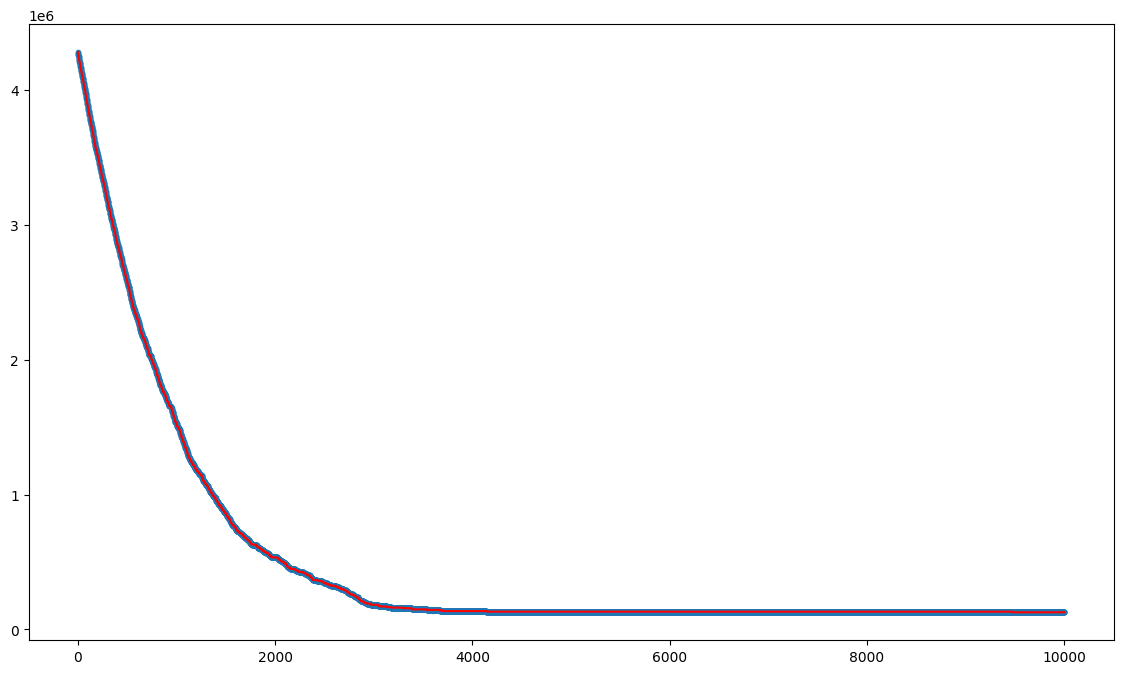

In [ ]:
from itertools import accumulate
from matplotlib import pyplot as plt
solution = np.full(NUM_SETS, True)
history = [cost(solution)]
tabu = []
for n in range(MAX_STEPS):
  new_solution = tweak(solution,tabu)
  if cost(new_solution) < cost(solution) and valid(new_solution):
    solution = new_solution
  history.append(cost(solution))

ic(cost(solution))
ic(history.index(cost(solution)))
print(history)

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)),history, marker=".")

In [ ]:
UNIVERSE_SIZE = 100000
NUM_SETS = 10000
DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [ ]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = pow(SETS.sum(axis=1), 1.1)

In [ ]:
MAX_STEPS = 50000 #50000 for universe_size=100000

ic| cost(solution): 127397.53101004352
ic| history.index(cost(solution)): 9477


[4278806.296816373, 4274461.092005154, 4270132.374280963, 4266015.1186300535, 4261792.25228355, 4257435.267497505, 4253151.271620147, 4248902.552529998, 4244500.777481265, 4240077.771496207, 4235876.046701519, 4231697.801181309, 4227175.595523283, 4222818.610737239, 4218591.044959405, 4214459.72196744, 4210043.793992812, 4205729.2035161, 4201548.610607012, 4197499.28530541, 4197499.28530541, 4193128.160727255, 4188921.738643893, 4184696.5226411205, 4180381.9321644083, 4176093.230714747, 4171797.4700266244, 4167464.042287682, 4163212.9722375087, 4158898.3817607965, 4154691.9596774345, 4150438.538549037, 4150438.538549037, 4146069.7708920436, 4141701.0032350505, 4137454.6349866698, 4133170.639109312, 4128799.5145311574, 4124506.107039786, 4120398.2271902957, 4116175.360843792, 4111975.9845144646, 4111975.9845144646, 4107630.7797032446, 4103311.480610586, 4099126.1925643138, 4094903.32621781, 4090664.0097846724, 4086316.4492104854, 4082105.329361543, 4077729.490594501, 4077729.490594501, 

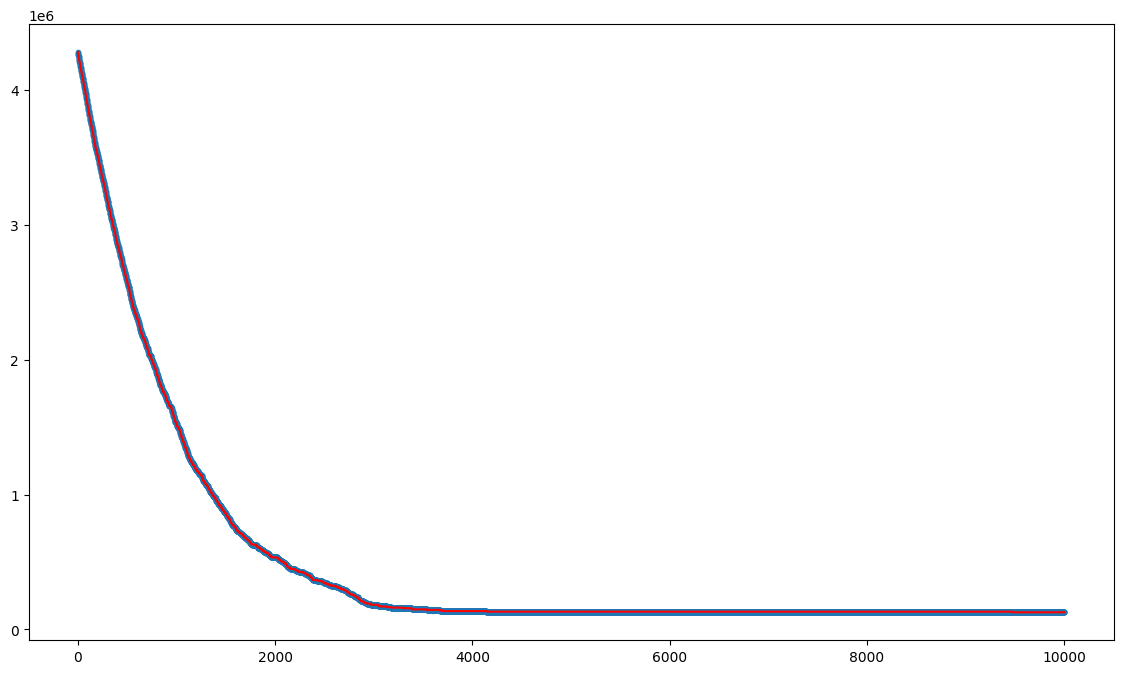

In [ ]:
from itertools import accumulate
from matplotlib import pyplot as plt
solution = np.full(NUM_SETS, True)
history = [cost(solution)]
tabu = []
for n in range(MAX_STEPS):
  new_solution = tweak(solution,tabu)
  if cost(new_solution) < cost(solution) and valid(new_solution):
    solution = new_solution
  history.append(cost(solution))

ic(cost(solution))
ic(history.index(cost(solution)))
print(history)

plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, min)),
    color="red",
)
_ = plt.scatter(range(len(history)),history, marker=".")

In [ ]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
valid(solution), cost(solution)

(False, 201.0400288303295)

In [ ]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(True, 309.10532113130034)

In [ ]:
rng.

SyntaxError: invalid syntax (<ipython-input-10-d59ac921d87d>, line 1)